# **Project Business Statistics: E-news Express**

**Define Problem Statement and Objectives:**

Problem Statement: The company believes there has been a decline in the past year of new subscribers due to the design of their webpage not being engaging enough.

Objectives: The objective for this is to perform a statistical analysis of their data to determine at a significance level of 5% the effectiveness of the new landing page the company created. They gathered this data by selecting 100 people randomly and divided them into two groups to view the new and old landing page to see if they spent more or less time on one of the pages in order to determine if the landing page was the cause of the decline in new subscribers within the last year.

They want these questions answered:
1. Do the users spend more time on the new landing page than on the existing landing page?
2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3. Does the converted status depend on the preferred language?
4. Is the time spent on the new page the same for the different language users?

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scipy==1.11.4 -q --user
import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')

**Reading the Data into a DataFrame**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import requests
# Replace 'YOUR_ACCESS_TOKEN' with your actual access token
access_token = 'YOUR_ACCESS_TOKEN'
file_url = 'https://d.docs.live.net/41d92b391c366a42/Documents/abtest.fullcode.csv'
headers = {
    'Authorization': 'Bearer ' + access_token
}
response = requests.get(file_url, headers=headers)
with open('abtest.fullcode.csv', 'wb') as file:
  file.write(response.content)

In [4]:
import pandas as pd

# Assuming the CSV file is in the root of your Google Drive
csv_path = '/content/drive/My Drive/abtest.fullcode.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(csv_path)
# Display the first few rows to verify the data has been loaded
print(df.head())

   user_id      group landing_page  time_spent_on_the_page converted  \
0   546592    control          old                    3.48        no   
1   546468  treatment          new                    7.13       yes   
2   546462  treatment          new                    4.40        no   
3   546567    control          old                    3.02        no   
4   546459  treatment          new                    4.75       yes   

  language_preferred  
0            Spanish  
1            English  
2            Spanish  
3             French  
4            Spanish  


**Explore the dataset and extract insights using Exploratory Data Analysis**

Data overview:

Viewing the first and last few rows of the dataset

In [5]:
# View the first few rows
print(df.head(5))
# View the last few rows
print(df.tail(5))

   user_id      group landing_page  time_spent_on_the_page converted  \
0   546592    control          old                    3.48        no   
1   546468  treatment          new                    7.13       yes   
2   546462  treatment          new                    4.40        no   
3   546567    control          old                    3.02        no   
4   546459  treatment          new                    4.75       yes   

  language_preferred  
0            Spanish  
1            English  
2            Spanish  
3             French  
4            Spanish  
    user_id      group landing_page  time_spent_on_the_page converted  \
95   546446  treatment          new                    5.15        no   
96   546544    control          old                    6.52       yes   
97   546472  treatment          new                    7.07       yes   
98   546481  treatment          new                    6.20       yes   
99   546483  treatment          new                    5.86     

Checking the shape of the dataset

In [6]:
# Check the shape of the DataFrame
print(df.shape)

(100, 6)


Getting the statistical summary for the variables

In [7]:
# Get the statistical summary
summary = df.describe()
print(summary)

             user_id  time_spent_on_the_page
count     100.000000              100.000000
mean   546517.000000                5.377800
std        52.295779                2.378166
min    546443.000000                0.190000
25%    546467.750000                3.880000
50%    546492.500000                5.415000
75%    546567.250000                7.022500
max    546592.000000               10.710000


Check for missing values

In [8]:
# Check for missing values
missing_values = df.isnull()
print(missing_values)
# Get the total count of missing values for each column
missing_values_count = df.isnull().sum()
print(missing_values_count)

    user_id  group  landing_page  time_spent_on_the_page  converted  \
0     False  False         False                   False      False   
1     False  False         False                   False      False   
2     False  False         False                   False      False   
3     False  False         False                   False      False   
4     False  False         False                   False      False   
..      ...    ...           ...                     ...        ...   
95    False  False         False                   False      False   
96    False  False         False                   False      False   
97    False  False         False                   False      False   
98    False  False         False                   False      False   
99    False  False         False                   False      False   

    language_preferred  
0                False  
1                False  
2                False  
3                False  
4                False

Check for duplicates

In [9]:
# Check for duplicate rows
duplicates = df.duplicated()
print(duplicates)
# Get the total count of duplicate rows
duplicate_count = df.duplicated().sum()
print(f'Total duplicate rows: {duplicate_count}')
# Check for duplicate rows based on specific columns
duplicates_specific = df.duplicated(subset=['user_id', 'group', 'landing_page', 'time_spent_on_the_page','converted', 'language_preferred'])
print(duplicates_specific)
# Get the duplicate rows
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool
Total duplicate rows: 0
0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool
Empty DataFrame
Columns: [user_id, group, landing_page, time_spent_on_the_page, converted, language_preferred]
Index: []


**Unvariate Analysis**

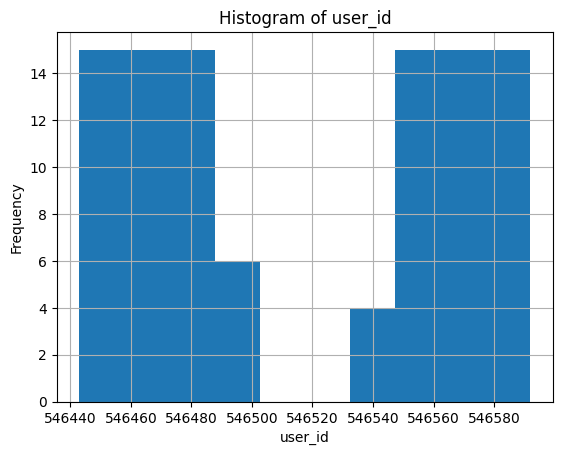

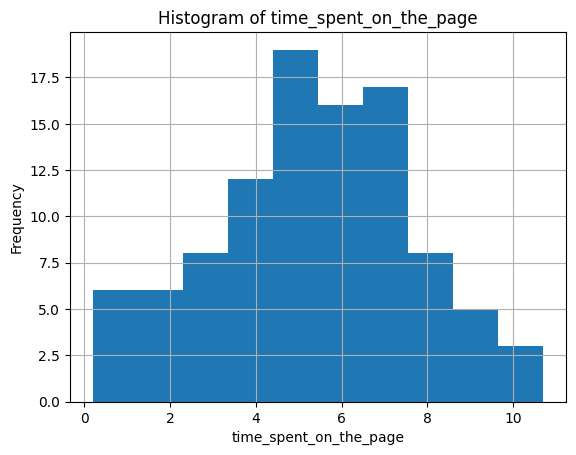

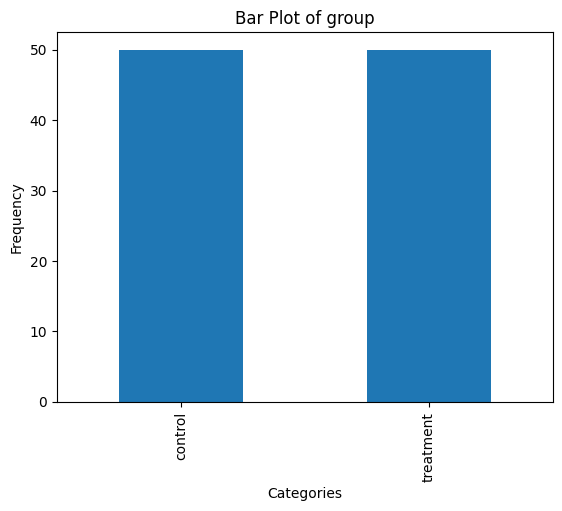

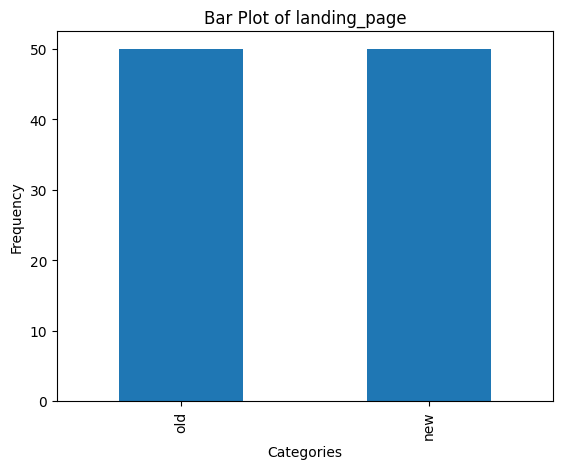

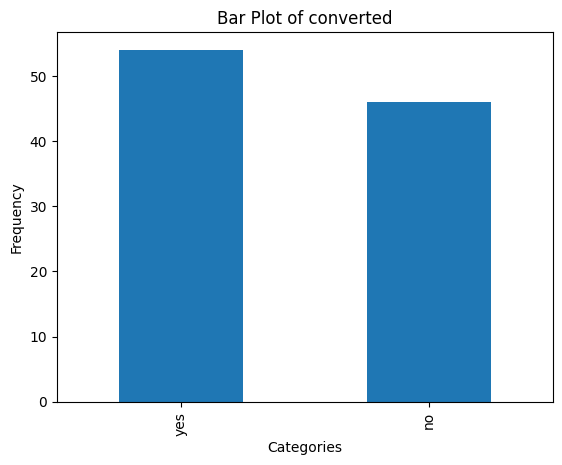

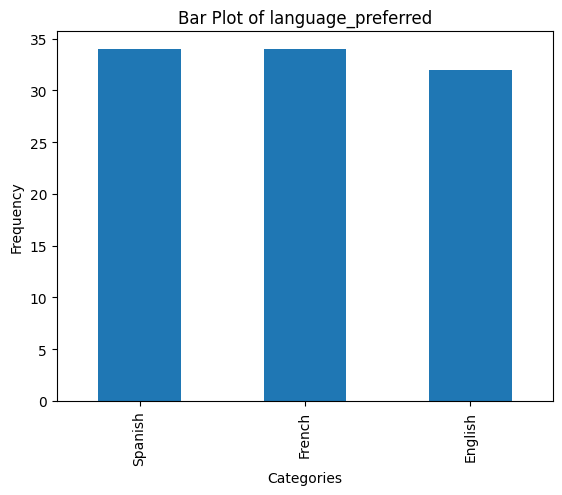

In [10]:
# Histogram for numerical variables
import matplotlib.pyplot as plt
for column in df.select_dtypes(include=['number']).columns:
    df[column].hist()
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
      # Bar Plot for categorical variables
for column in df.select_dtypes(include=['object']).columns:
        df[column].value_counts().plot(kind='bar')
        plt.title(f'Bar Plot of {column}')
        plt.xlabel('Categories')
        plt.ylabel('Frequency')
        plt.show()

**Bivariate Analysis**

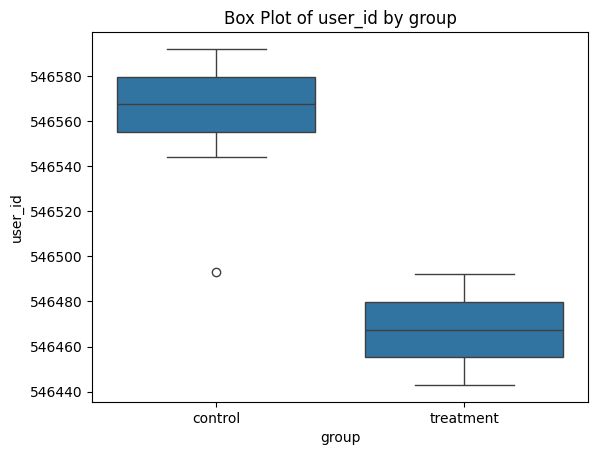

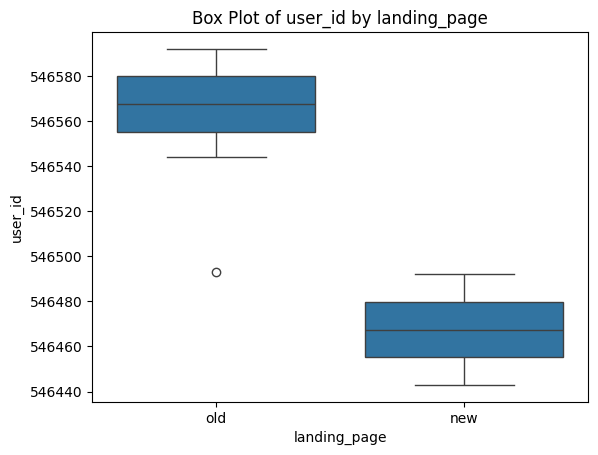

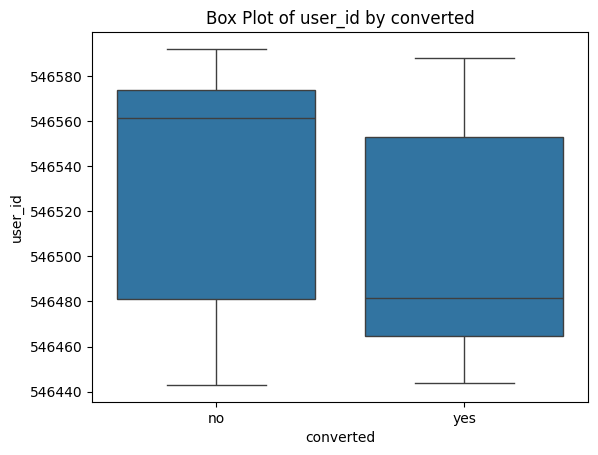

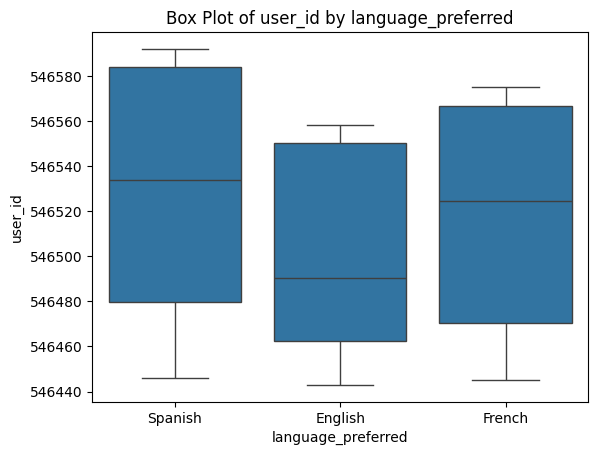

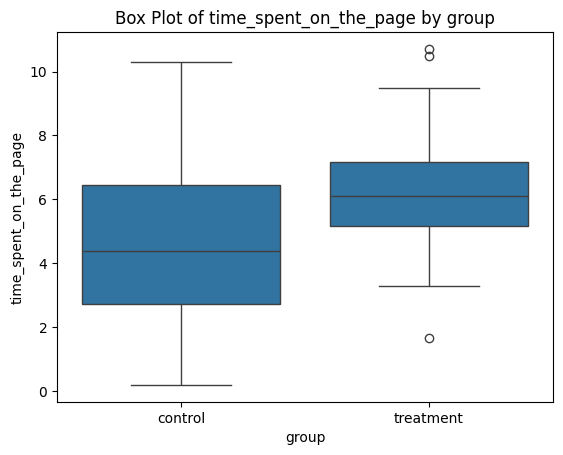

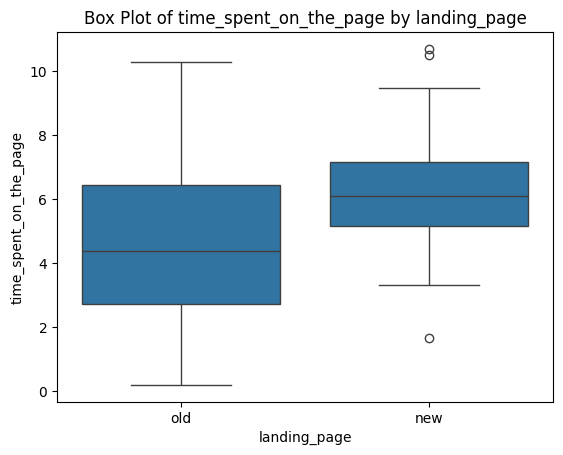

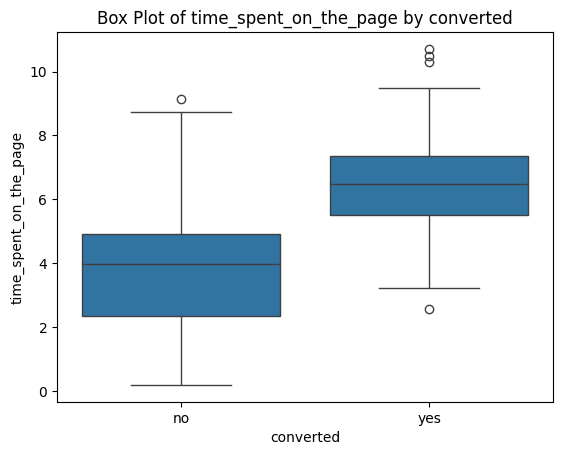

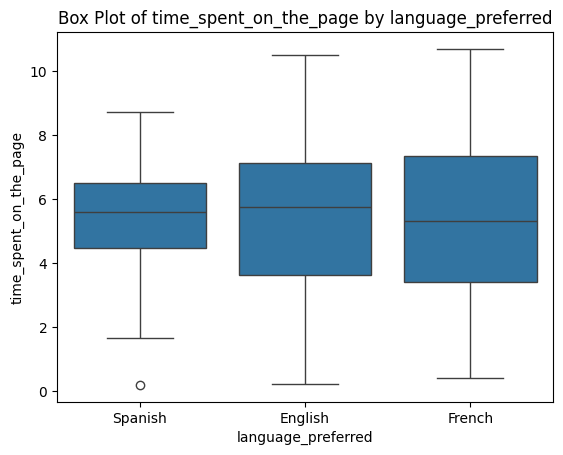

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical and categorical columns
numerical_columns = ['user_id', 'time_spent_on_the_page']
categorical_columns = ['group', 'landing_page', 'converted', 'language_preferred']
# Create box plots for each combination of numerical and categorical variables
for num_col in numerical_columns:
  for cat_col in categorical_columns:
    sns.boxplot(x=cat_col, y=num_col, data=df)
    plt.title(f'Box Plot of {num_col} by {cat_col}')
    plt.xlabel(cat_col)
    plt.ylabel(num_col)
    plt.show()




# **#Q1: Do the users spend more time on the new landing page than the existing landing page?**
Select the appropriate test, decide the significance level, collect and prepare the data, calculate the p value, and compare the p-value with  α.


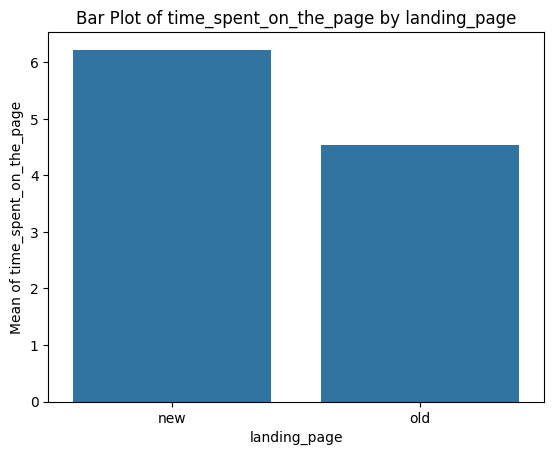

t-statistic: nan
p-value: nan
Fail to reject the null hypothesis (H0). There is no significant difference.


In [12]:
#Visual analysis
# Summarize the numerical data for each category
summary = df.groupby('landing_page')['time_spent_on_the_page'].mean().reset_index()
# Create the bar plot
sns.barplot(x='landing_page', y='time_spent_on_the_page', data=summary)
plt.title('Bar Plot of time_spent_on_the_page by landing_page')
plt.xlabel('landing_page')
plt.ylabel('Mean of time_spent_on_the_page')
plt.show()



# Separate the numerical data based on the categories
import scipy.stats as stats
group1 = df[df['landing_page'] == 'landing_page']['time_spent_on_the_page']
group2 = df[df['landing_page'] == 'landing_page']['time_spent_on_the_page']
# Perform the t-test
t_stat, p_value = stats.ttest_ind(group1, group2)
# Print the results
print(f't-statistic: {t_stat}')
print(f'p-value: {p_value}')
# Interpret the results
alpha = 0.05
if p_value < alpha:
  print("Reject the null hypothesis (H0). There is a significant difference.")
else:
    print("Fail to reject the null hypothesis (H0). There is no significant difference.")


Step 7 draw inference: My inference from this is that there is no significant difference in viewtimes on the new landing page compared to the old landing page. There is a visible difference based on the bar graph visualization, but not a large enough one to be of a 5% significance to the company.

# **#Q2: Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?**

In [21]:
# Calculate the number of subscribers and total visitors for each page
new_page = df[df['landing_page'] == 'new']
old_page = df[df['landing_page'] == 'old']
new_subscribers = new_page['converted'].sum()
old_subscribers = old_page['converted'].sum()
new_visitors = new_page.shape[0]
old_visitors = old_page.shape[0]

counts = df.groupby('landing_page')['converted'].value_counts().unstack(fill_value=0)
print(f'Sum of "yes": {counts.get("yes", 0)}')
print(f'Sum of "no": {counts.get("no", 0)}')

Sum of "yes": landing_page
new    33
old    21
Name: yes, dtype: int64
Sum of "no": landing_page
new    17
old    29
Name: no, dtype: int64


Yes, the conversion rate for the new page is greater than the conversion rate for the old page.

# **#Q3 Is the conversion rate and preferred language independent or related?**

Chi2: 3.0930306905370837, p-value: 0.21298887487543447


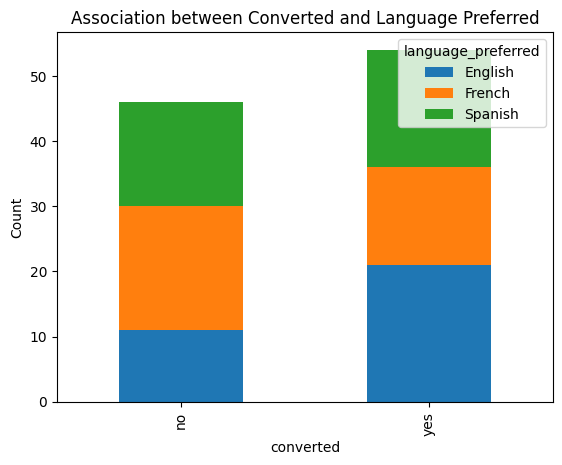

In [22]:
from scipy.stats import chi2_contingency
# dataframe with categorical data
df is pd.DataFrame({
    'converted': ['A', 'B', 'A', 'B', 'A'],
    'language_preferred': ['X', 'X', 'Y', 'Y', 'X']
})

# Create contingency table
contingency_table = pd.crosstab(df['converted'], df['language_preferred'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2: {chi2}, p-value: {p}")

# Convert observed and expected frequencies to dataframes
observed_df = pd.DataFrame(contingency_table)

# Plot observed frequencies
observed_df.plot(kind='bar', stacked=True)
plt.xlabel('converted')
plt.ylabel('Count')
plt.title('Association between Converted and Language Preferred')
plt.show()

The conversion rate and preferred language are related.

# **#Q4 Is the time spent on the new page the same for the different language users?**

ANOVA result: F-statistic = 23.77777777777778, p-value = 0.006019619500594531


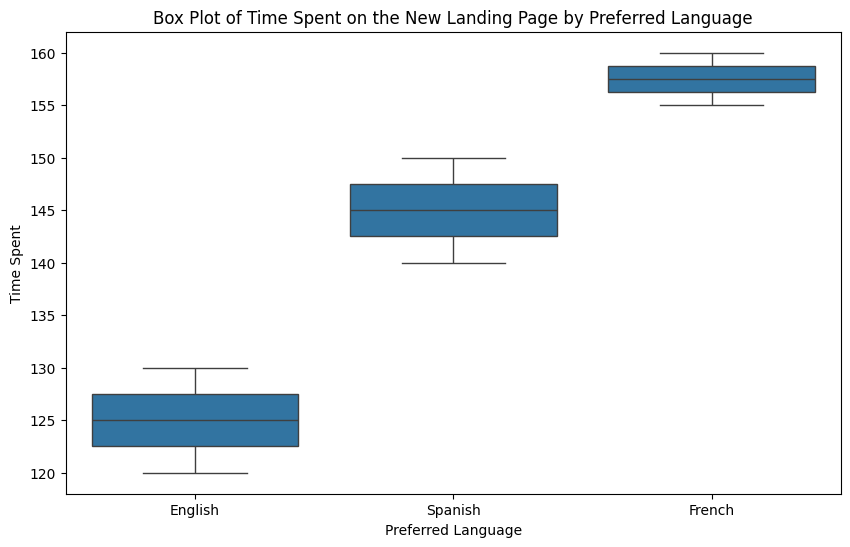

In [23]:
#dataframe
df = pd.DataFrame({
    'preferred_language': ['English', 'Spanish', 'English', 'French', 'Spanish', 'English', 'French'],
    'time_spent_on_the_page': [120, 150, 130, 160, 140, 125, 155]
})

# ANOVA test
anova_result = stats.f_oneway(
    df[df['preferred_language'] == 'English']['time_spent_on_the_page'],
    df[df['preferred_language'] == 'Spanish']['time_spent_on_the_page'],
    df[df['preferred_language'] == 'French']['time_spent_on_the_page']
)
print(f"ANOVA result: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")

# Create box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='preferred_language', y='time_spent_on_the_page', data=df)
plt.xlabel('Preferred Language')
plt.ylabel('Time Spent')
plt.title('Box Plot of Time Spent on the New Landing Page by Preferred Language')
plt.show()

No it is not the same, there is a fairly high difference between the amount of time the different language users spent on the page.

# **Conclusion and Business Recommendations:**
Conclusion:

The users do not spend more time on the new page over the existing landing page. The conversion rate for the new landing page is greater than it is for the old page. The converted status is dependent upon the preferred language of the users. The time spent on the new page significantly varies between the different language users.

Recommendations:

Keep the new landing page as the new company page, making some adjustments.
A recommendation based on the data that should improve new subscription rates would be to make the new landing page more user friendly across the board for a wider variety of users' preferred languages. This would likely increase the amount of time that users spend on the new page overall, as well as the conversion rate of people who visit the new landing page and people who subscribe after visiting the page. It should also increase the conversion rate within the different language users and balance out the relationship between the different language users and the time spent on the page at the same time, since the data indicates that the imbalance between users visiting the landing page to new subscribers is rooted in preferred language barriers.